# **WALMART CAPSTONE PROJECT**

**Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.**


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
data=pd.read_csv('Walmart DataSet.csv')
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# change the datatype of Date column

data['Date']=pd.to_datetime(data['Date'])

In [ ]:
# get data of different stores

store_9=data[data['Store']==9]
store_13=data[data['Store']==13]
store_30=data[data['Store']==30]
store_41=data[data['Store']==41]

In [ ]:
# select column of weekly sales only

sales_9=store_9[['Weekly_Sales']]
sales_13=store_13[['Weekly_Sales']]

In [ ]:
sales_9.head()

Weekly_Sales
1144     549505.55
1145     552677.48
1146     511327.90
1147     473773.27
1148     507297.88

In [ ]:
# reset the index as the default index is not acceptable
sales_9.reset_index(inplace=True)
sales_9=sales_9.drop(columns=['index'])

#set the index to date
sales_9=sales_9.set_index(store_9['Date'])

In [ ]:
# reset the index as the default index is not acceptable
sales_13.reset_index(inplace=True)
sales_13=sales_13.drop(columns=['index'])

#set the index to date
sales_13=sales_13.set_index(store_13['Date'])

In [ ]:
sales_9.head(2)

Weekly_Sales
Date                    
2010-05-02     549505.55
2010-12-02     552677.48

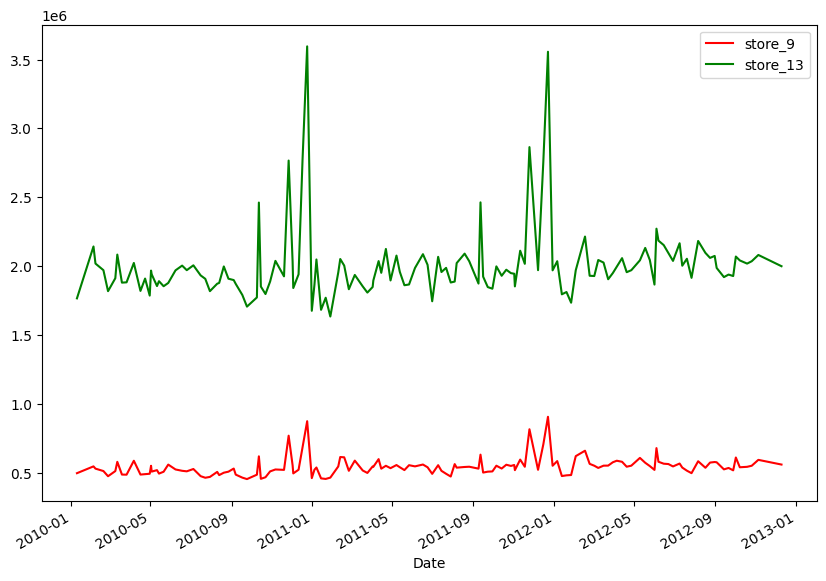

In [56]:
# comparing sales of store no. 9 & 13

plt.figure(figsize=(10,7))
sales_9.Weekly_Sales.plot(label='store_9',color='red')
sales_13.Weekly_Sales.plot(label='store_13',color='green')
plt.legend()
plt.show()

**If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?**


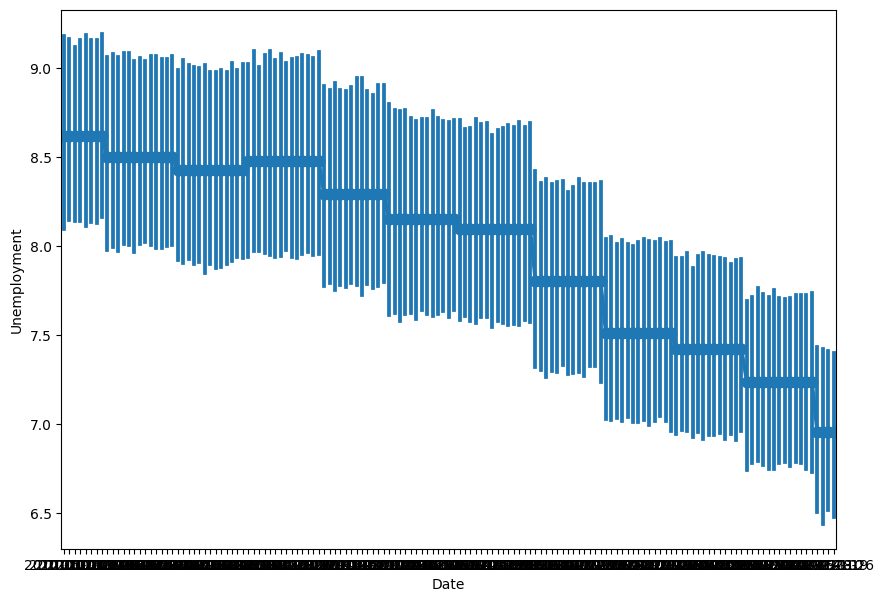

In [58]:
plt.figure(figsize=(10,7))
sns.pointplot(data=data,x='Date',y='Unemployment')
plt.show()

# unemployment is coming down over the years so it can affect the sales

 **If the weekly sales show a seasonal trend, when and what could be the reason?**


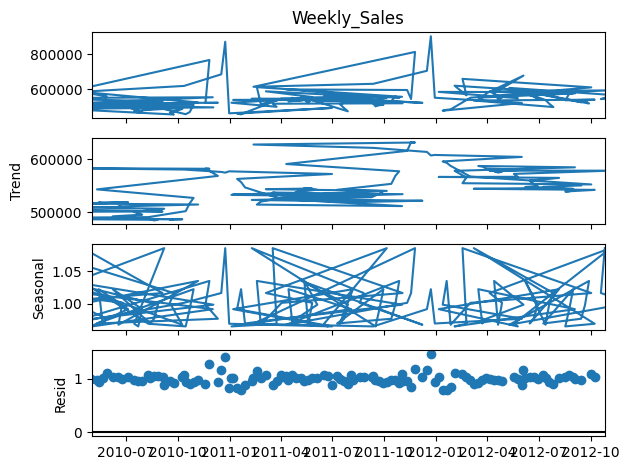

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose=seasonal_decompose(sales_9.Weekly_Sales, period=12,model='multiplicative')
decompose.plot()
plt.show()

<Axes: xlabel='Date'>

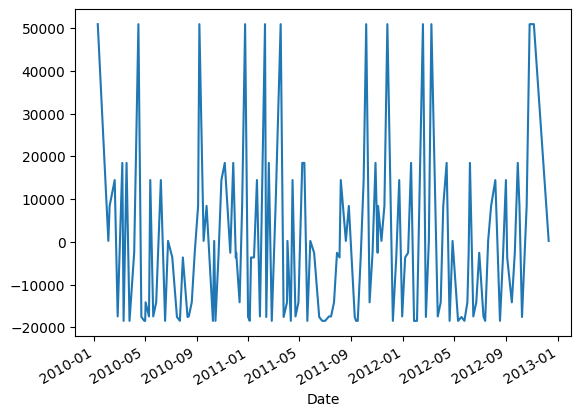

In [ ]:
# there seems to be no seasonality in the weekly sales
decompose.seasonal.plot()

**Does temperature affect the weekly sales in any manner?**

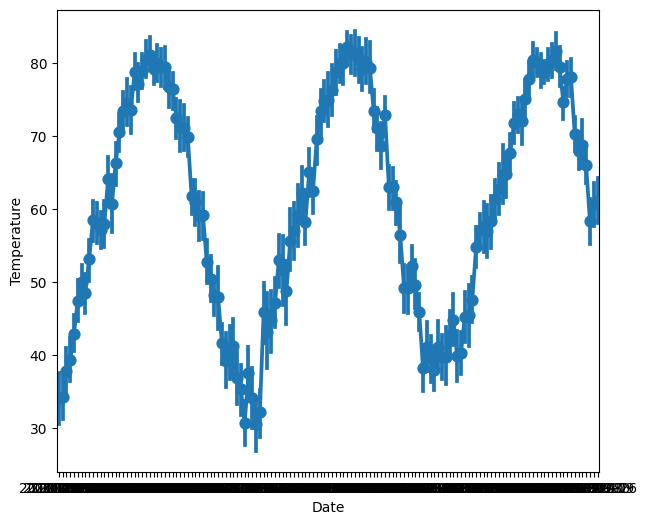

In [59]:
plt.figure(figsize=(7,6))
sns.pointplot(data=data,x='Date',y='Temperature')
plt.show()

# with the time, temp. shows seasonality

**How is the Consumer Price index affecting the weekly sales of various stores?**

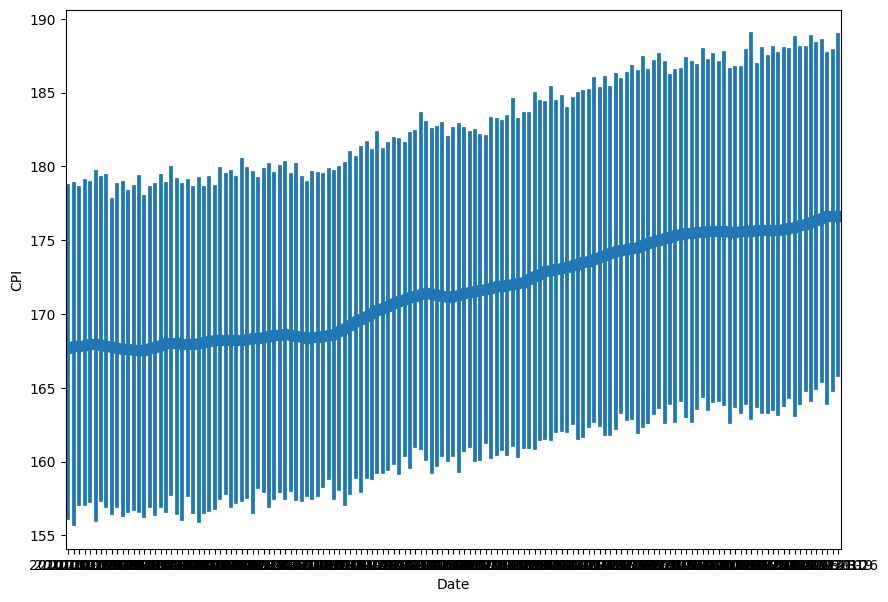

In [61]:
plt.figure(figsize=(10,7))
sns.pointplot(data=data,x='Date',y='CPI')
plt.show()

# CPI is increasing over the time, so it can affect the sales

**Top performing stores according to the historical data.**

In [ ]:
stores=pd.DataFrame(data.groupby(by=['Store'])['Weekly_Sales'].sum()).sort_values(by='Weekly_Sales',ascending=False)
stores.head(5)

# top performing store is 20

Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08

In [ ]:
stores['Weekly_Sales'].max()

301397792.46

**The worst performing store, and how significant is the difference between the
highest and lowest performing stores.**

In [ ]:
stores.tail(1)

# worst performing store is 33.

Weekly_Sales
Store              
33      37160221.96

In [ ]:
# difference between the highest and lowest performing stores

stores['Weekly_Sales'].max()-stores['Weekly_Sales'].min()

264237570.49999997

**Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks**

In [82]:
del sales_9['predict']

KeyError: 'predict'

In [83]:
# Modelling through SARIMAX model

import  statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_9,
        order=(4,3,2),seasonal_order=(1,1,0,52),
        enforce_invertibility=False)

models=model.fit()
print(models.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(4, 3, 2)x(1, 1, [], 52)   Log Likelihood               -1039.095
Date:                             Sun, 03 Mar 2024   AIC                           2094.190
Time:                                     11:33:15   BIC                           2114.008
Sample:                                          0   HQIC                          2102.174
                                             - 143                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.134      0.116      0.908      -0.246       0.277
ar.L2          0.1809      

In [84]:
# prediction

sales_9['predict']=models.predict(start=pd.to_datetime('2012-07-27'),dynamic=True,full_results=True)
sales_9[['Weekly_Sales','predict']].plot()


<Axes: xlabel='Date'>

In [85]:

y_true=sales_9.loc['2012-07-27':,'Weekly_Sales'].mean()
y_pred=sales_9['predict'].mean()

In [86]:
y_pred

540122.6323625117

In [87]:
# Compute the mean square error
mse = ((y_pred - y_true) ** 2).mean()
print('The Mean Squared Error of our prediction is {}'.format(round(mse, 2)))

The Mean Squared Error of our prediction is 180071734.1


In [88]:
# residual error
Residual= y_pred - y_true
print("Residual for Store9",np.abs(Residual).sum())

Residual for Store9 13419.080970821553


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

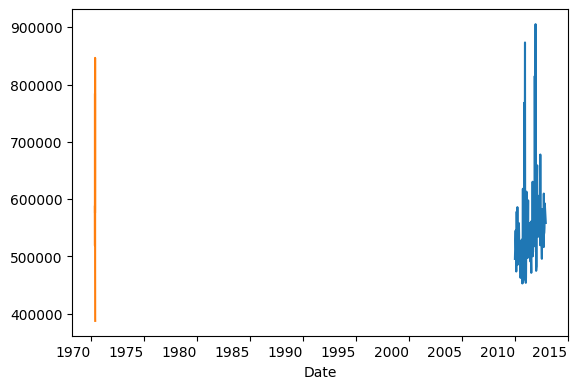

In [89]:
# forecasting for next 12 weeks

forecasts=models.forecast(steps=12)
sales_9['Weekly_Sales'].plot()
forecasts.plot()

**CONCLUSION:**

Walmart store has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.So the further analysis is done :



1.   Weekly Sales depend on many factors such as Unemployment, Temperature, CPI,etc.
2.   Unemployment is decreasing over time so it can affect the sales
1.   Temperature shows seasonality and repeation over time
2.  CPI is increasing over time
1.   Top Performing store is 20 with total sales amount 301397792.46
2.   Worst Performing store is 33 with total sales amount 37160221.96
1.   difference between the highest and lowest performing stores is 264237570.5
2.   After prediction, the mean of predicted value is 540122.63
1.   Residual error for store 9 is 13419.08
2.   Mean squared error for store is 180071734.1
1.  After the prediction, value for weekly sales is also forecasted for next 12 weeks and visaulised.














